# Implement Scalable Spectral Clustering with Cosine Similarity

In [1]:
# import libraries 
import pandas as pd 
import numpy as np 
import numpy.random as npr
import math
import numpy.matlib

import matplotlib.pyplot as plt
from sklearn import metrics

import time


# set the random seed so i could get the same results everytime 
npr.seed(10)

In [2]:
start_time = time.time()
# number of points per line
n1 = 1000
# number of clusters
k = 3  
# level of noise
noise_level = 0.25

# Generate DataSet 
x = np.linspace(1, 10, n1)[:, np.newaxis]
x.shape

(1000, 1)

In [3]:
X = np.concatenate((x, 3*x), axis=1)
X = np.concatenate((X, np.concatenate((x, x), axis=1)), axis=0)
X = np.concatenate((X, np.concatenate((x, 0.1*x), axis=1)), axis=0)

In [4]:
# Generate Noise 
n = 3 * n1

noise = npr.randn(n, 2) * noise_level

X += noise
X[X < 0] = 0

# true levels [1 to 3]
truelabels = np.repeat(np.arange(1, k+1), n1)
#truelabels.shape, X.shape

In [5]:
# Normalize Data X 
legend= [1,2,3]
X_norm = X / np.sqrt(np.sum(X**2, axis=1))[:, np.newaxis]
X_norm.shape
#X_norm

(3000, 2)

Text(0.5, 1.0, 'Normalized X data')

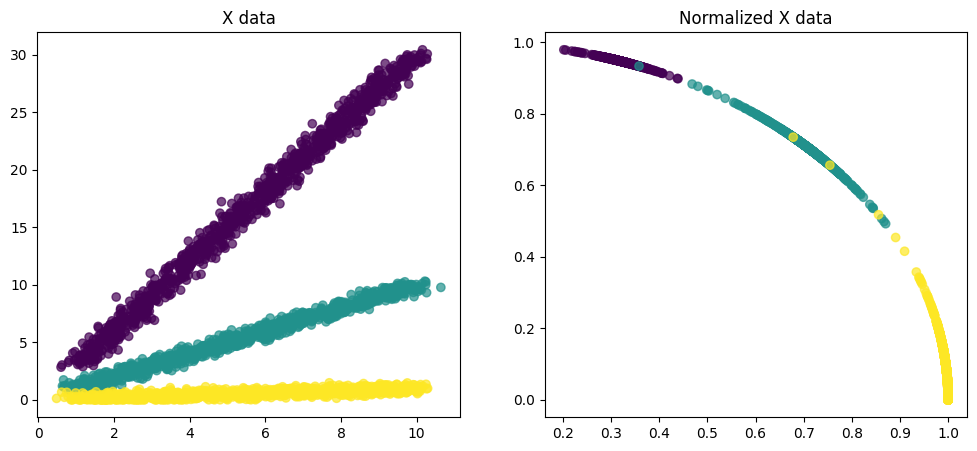

In [6]:
fig, axs = plt.subplots(1,2, figsize = (12,5))

axs[0].scatter(X[:,0], X[:,1], alpha = 0.7 , c = truelabels, cmap='viridis')
axs[0].set_title("X data")

axs[1].scatter(X_norm[:,0], X_norm[:,1], alpha = 0.7, c = truelabels, cmap = 'viridis')
axs[1].set_title("Normalized X data")

$ \vec{d} = W\vec{1}= (X*X^T - I)\vec{1} = X*X^T - I \vec{1} = X(X^T\vec{1}) -\vec{1} $

$X^T\vec{1} = (sum(x,1))^T $

$X^T\vec{1}$ as $(\sum_{i=1}^n x_{i,1}, \sum_{i=1}^n x_{i,2}, ..., \sum_{i=1}^n x_{i,d})^T$

In [7]:
# create one_vec 
vec1 = np.ones((3000, 2))

# get d_vec 
d_vec = X @ (X.T @ vec1) - vec1 

$ D^{-\frac{1}{2}} = 1 / \sqrt{d}$ 

In [8]:
# D_sqrt_inv

D_sqrt_inv = 1 / np.sqrt(d_vec)

$\tilde{X} = D^{-\frac{1}{2}} * X $

In [9]:
# tilde_X 

tilde_X = D_sqrt_inv *X
tilde_X.shape

(3000, 2)

In [10]:
# tilde_U = SVD(X)
tilde_U, S, Vt = np.linalg.svd(tilde_X)

In [11]:
## Apply k-means clustering on the transformed data
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

## initialization part
kmeans = KMeans(n_clusters=k)

kmeans.fit(tilde_U)

/Users/joellecho/opt/anaconda3/envs/tf2/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [12]:
# correct the labels of the K-means output
labels_pred = kmeans.predict(tilde_U)

pred_labels = labels_pred.copy()

pred_labels[pred_labels == 0] = truelabels[pred_labels == 0]
pred_labels[pred_labels == 1] = truelabels[pred_labels == 1]
pred_labels[pred_labels == 2] = truelabels[pred_labels == 2]

# Compute accuracy score
accuracy = accuracy_score(truelabels, pred_labels)
print("Accuracy: ", round(accuracy,2))

Accuracy:  1.0


Text(0.5, 1.0, 'Spectral Clustering Results')

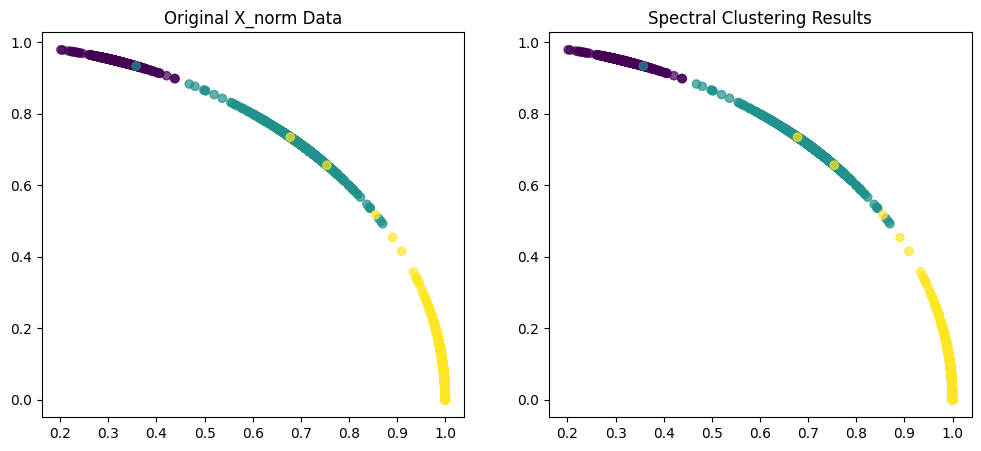

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# Visualize the original data
axs[0].scatter(X_norm[:, 0], X_norm[:, 1], alpha = 0.7, c = truelabels, cmap = 'viridis')
axs[0].set_title('Original X_norm Data')


# Visualize the results of spectral clustering
axs[1].scatter(X_norm[:, 0], X_norm[:, 1], alpha = 0.7, c = pred_labels, cmap='viridis')
axs[1].set_title('Spectral Clustering Results')


In [14]:
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time, "seconds")

Elapsed time:  1.1915278434753418 seconds


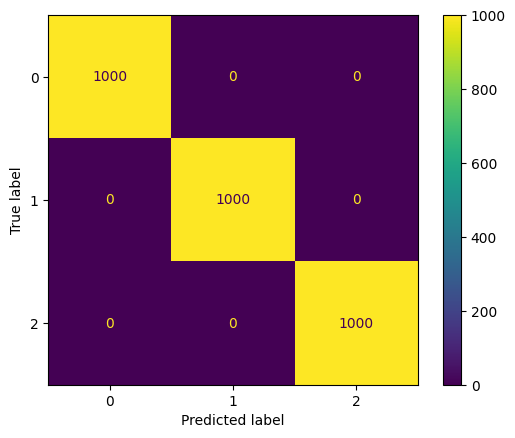

In [15]:
confusion = metrics.confusion_matrix(truelabels, pred_labels)
confusion_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion)

confusion_display.plot()
plt.show()